In [1]:
import keras
print(keras.__version__)
import keras_genomics
print(keras_genomics.__version__)

/Users/avantishrikumar/anaconda/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Couldn't import dot_parser, loading of dot files will not be possible.
2.1.6
2.0.0


In [7]:

kernel_size=11
filters=30
input_length=200

model = keras.models.Sequential()
model.add(keras_genomics.layers.RevCompConv1D(
            filters=filters, kernel_size=kernel_size,
            input_shape=(input_length,4), activation="relu",
            padding="same"))
model.add(keras_genomics.layers.normalization.RevCompConv1DBatchNorm())
model.add(keras_genomics.layers.RevCompConv1D(
            filters=filters, kernel_size=kernel_size,
            activation="relu",
            padding="same"))
model.add(keras_genomics.layers.normalization.RevCompConv1DBatchNorm())
model.add(keras.layers.pooling.MaxPooling1D(pool_size=20,stride=20,
                                            padding="same"))
model.add(keras_genomics.layers.core.DenseAfterRevcompConv1D(
            units=10, activation="relu"))
model.add(keras_genomics.layers.core.Dense(
            units=1))



/Users/avantishrikumar/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(padding="same", strides=20, pool_size=20)`


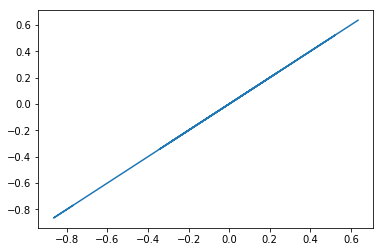

[(-0.7706965, -0.7706949), (-0.8645781, -0.8645775), (-0.22654659, -0.22654873), (-0.011404306, -0.011404663), (0.23331106, 0.23331285), (-0.34347564, -0.34347516), (0.5234921, 0.523491), (-0.28686386, -0.2868638), (-0.0024428964, -0.0024437904), (0.63502157, 0.6350211)]


In [12]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

random_input = np.random.random((10, input_length, 4))
fwd_preds = model.predict(random_input)
rev_preds = model.predict(random_input[:,::-1,::-1])
plt.plot(fwd_preds, rev_preds)
plt.show()

assert np.max(np.abs(fwd_preds-rev_preds)) < 1e-5

print(zip(fwd_preds.squeeze(), rev_preds.squeeze()))